<a href="https://colab.research.google.com/github/juandayi/Machine-Learning-DAS/blob/main/STEADDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [30]:

df=pd.read_csv('gdrive/My Drive/Colab Notebooks/Seismic Dataset/unzipdataChunk2/chunk2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
df.shape

(200000, 35)

In [5]:
df[:5]

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,s_arrival_sample,s_status,s_weight,source_id,source_origin_time,source_origin_uncertainty_sec,source_latitude,source_longitude,source_error_sec,source_gap_deg,source_horizontal_uncertainty_km,source_depth_km,source_depth_uncertainty_km,source_magnitude,source_magnitude_type,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,trace_name
0,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.5,17.080000,1894.0,manual,0.5,8556349,2006-07-23 15:58:50.88,0.47,33.7496,-117.4938,1.1119,107.466,4.6403,0.45,None,3.6,ml,None,None,0.92,102.09,159.3,[56.79999924 55.40000153 47.40000153],[[2896.]],2006-07-23 15:59:00.960000,earthquake_local,109C.TA_20060723155859_EV
1,TA,109C,BH,32.8889,-117.1051,150.0,600.0,manual,0.5,16.879999,1763.0,manual,0.5,8860238,2006-11-03 15:56:42.73,0.24,32.7077,-116.0446,0.899,37.593,2.9542,9.2,None,4.3,mb,None,None,0.91,101.34,281.7,[65. 65.5 61.40000153],[[5508.]],2006-11-03 15:56:53.610000,earthquake_local,109C.TA_20061103155652_EV
2,TA,109C,BH,32.8889,-117.1051,150.0,500.0,manual,0.5,17.260000,1678.0,manual,0.5,8940123,2006-11-03 16:12:12.44,0.27,32.7253,-116.0348,0.8127,48.096,3.0397,12.66,None,3.6,ml,None,None,0.92,101.87,280.5,[37.20000076 42. 38.59999847],[[3114.]],2006-11-03 16:12:24.700000,earthquake_local,109C.TA_20061103161223_EV
3,TA,109C,BH,32.8889,-117.1051,150.0,900.0,manual,0.5,17.280001,2086.0,manual,0.5,9443190,2006-11-14 13:32:14.26,0.25,32.7063,-116.0241,0.9173,43.783,2.6112,11.5,None,3.8,ml,None,None,0.93,103.26,281.6,[54.09999847 54.90000153 45.5 ],[[3152.]],2006-11-14 13:32:22.540000,earthquake_local,109C.TA_20061114133221_EV
4,TA,109C,BH,32.8889,-117.1051,150.0,700.0,manual,0.5,18.139999,1897.0,manual,0.5,9443449,2006-11-27 10:46:29.92,0.67,31.9679,-117.1944,1.0362,182.145,5.6607,7.26,None,3.6,ml,None,None,0.92,102.48,4.7,[58.20000076 56.20000076 53.79999924],[[3134.]],2006-11-27 10:46:41.060000,earthquake_local,109C.TA_20061127104640_EV


In [6]:
print(f'total events in csv file: {len(df)}')

total events in csv file: 200000


In [7]:
df.index

RangeIndex(start=0, stop=200000, step=1)

In [32]:
# filterering the dataframe
df = df[(df.trace_category == 'earthquake_local') & (df.source_distance_km <= 20) & (df.source_magnitude > 3)]
print(f'total events selected: {len(df)}')

total events selected: 268


In [33]:
# making a list of trace names for the selected data
ev_list = df['trace_name'].to_list()

In [34]:
ev_list[:5]

['A16.CN_20150121053158_EV',
 'A64.CN_20130711201601_EV',
 'AC04.C1_20140616231955_EV',
 'AC04.C1_20140720063145_EV',
 'AC04.C1_20140720063148_EV']

In [39]:
#read one signal shape(6000,3)
hdf5_path = 'gdrive/My Drive/Colab Notebooks/Seismic Dataset/unzipdataChunk2/chunk2.hdf5'
with h5py.File(hdf5_path, "r") as h5_file:
  ls=list(h5_file.keys())
  print('List of keys of the file: \n', ls)
  #base_items=list(h5_file.items())
  #print('List of keys of the file: \n', base_items)
  Signal1=h5_file.get('data/'+str('A16.CN_20150121053158_EV'))  
  #Signal1items=list(Signal1.keys())
  print('List of keys of the file: \n', Signal1)
  atributos=Signal1.attrs
  data2 = np.array(atributos)
  
  data = np.array(Signal1)
  #data=h5_file.get('data')
  #dataset=np.array(data)

List of keys of the file: 
 ['data']
List of keys of the file: 
 <HDF5 dataset "A16.CN_20150121053158_EV": shape (6000, 3), type "<f4">


In [12]:
data.shape

(6000, 3)

In [40]:
data2

array(['back_azimuth_deg', 'coda_end_sample', 'network_code',
       'p_arrival_sample', 'p_status', 'p_travel_sec', 'p_weight',
       'receiver_code', 'receiver_elevation_m', 'receiver_latitude',
       'receiver_longitude', 'receiver_type', 's_arrival_sample',
       's_status', 's_weight', 'snr_db', 'source_depth_km',
       'source_depth_uncertainty_km', 'source_distance_deg',
       'source_distance_km', 'source_error_sec', 'source_gap_deg',
       'source_horizontal_uncertainty_km', 'source_id', 'source_latitude',
       'source_longitude', 'source_magnitude', 'source_magnitude_author',
       'source_magnitude_type', 'source_mechanism_strike_dip_rake',
       'source_origin_time', 'source_origin_uncertainty_sec',
       'trace_category', 'trace_name', 'trace_start_time'], dtype='<U32')

In [13]:
data[:,1]

array([-0.        , -0.0137389 , -0.03770534, ...,  0.06960968,
        0.04253528,  0.        ], dtype=float32)

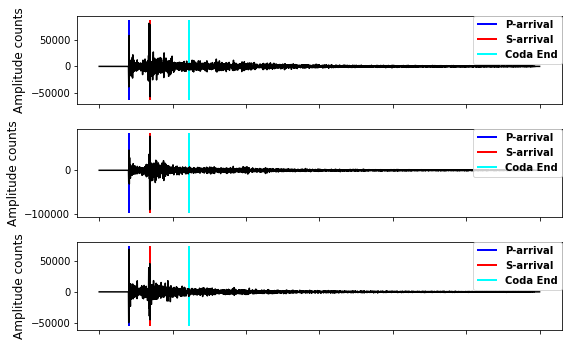

back_azimuth_deg 56.9
coda_end_sample [[1228.]]
network_code CN
p_arrival_sample 400.0
p_status manual
p_travel_sec 4.630000114440918
p_weight 0.5
receiver_code A16
receiver_elevation_m 13.0
receiver_latitude 47.468
receiver_longitude -70.0096
receiver_type HH
s_arrival_sample 686.0
s_status manual
s_weight 0.5
snr_db [72.40000153 61.70000076 62.20000076]
source_depth_km 17.42
source_depth_uncertainty_km 7.6
source_distance_deg 0.18
source_distance_km 19.21
source_error_sec 0.8797
source_gap_deg 37.699
source_horizontal_uncertainty_km 2.68655
source_id 606589340
source_latitude 47.3748
source_longitude -70.2239
source_magnitude 3.7
source_magnitude_author None
source_magnitude_type mb_lg
source_mechanism_strike_dip_rake None
source_origin_time 2015-01-21 05:31:58.92
source_origin_uncertainty_sec 0.76
trace_category earthquake_local
trace_name A16.CN_20150121053158_EV
trace_start_time 2015-01-21 05:31:59.550000


In [45]:
hdf5_path = 'gdrive/My Drive/Colab Notebooks/Seismic Dataset/unzipdataChunk2/chunk2.hdf5'
with h5py.File(hdf5_path, "r") as h5_file:
 #for c, evi in enumerate(ev_list):
  dataset = h5_file.get('data/'+str('A16.CN_20150121053158_EV')) 
  # waveforms, 3 channels: first row: E channel, second row: N channel, third row: Z channel 
  data = np.array(dataset)
  fig = plt.figure()
  ax = fig.add_subplot(311)         
  plt.plot(data[:,0], 'k')
  plt.rcParams["figure.figsize"] = (8, 5)
  legend_properties = {'weight':'bold'}    
  plt.tight_layout()
  ymin, ymax = ax.get_ylim()
  pl = plt.vlines(dataset.attrs['p_arrival_sample'], ymin, ymax, color='b', linewidth=2, label='P-arrival')
  sl = plt.vlines(dataset.attrs['s_arrival_sample'], ymin, ymax, color='r', linewidth=2, label='S-arrival')
  cl = plt.vlines(dataset.attrs['coda_end_sample'], ymin, ymax, color='aqua', linewidth=2, label='Coda End')
  plt.legend(handles=[pl, sl, cl], loc = 'upper right', borderaxespad=0., prop=legend_properties)        
  plt.ylabel('Amplitude counts', fontsize=12) 
  ax.set_xticklabels([])

  ax = fig.add_subplot(312)         
  plt.plot(data[:,1], 'k')
  plt.rcParams["figure.figsize"] = (8, 5)
  legend_properties = {'weight':'bold'}    
  plt.tight_layout()
  ymin, ymax = ax.get_ylim()
  pl = plt.vlines(dataset.attrs['p_arrival_sample'], ymin, ymax, color='b', linewidth=2, label='P-arrival')
  sl = plt.vlines(dataset.attrs['s_arrival_sample'], ymin, ymax, color='r', linewidth=2, label='S-arrival')
  cl = plt.vlines(dataset.attrs['coda_end_sample'], ymin, ymax, color='aqua', linewidth=2, label='Coda End')
  plt.legend(handles=[pl, sl, cl], loc = 'upper right', borderaxespad=0., prop=legend_properties)        
  plt.ylabel('Amplitude counts', fontsize=12) 
  ax.set_xticklabels([])

  ax = fig.add_subplot(313)         
  plt.plot(data[:,2], 'k')
  plt.rcParams["figure.figsize"] = (8,5)
  legend_properties = {'weight':'bold'}    
  plt.tight_layout()
  ymin, ymax = ax.get_ylim()
  pl = plt.vlines(dataset.attrs['p_arrival_sample'], ymin, ymax, color='b', linewidth=2, label='P-arrival')
  sl = plt.vlines(dataset.attrs['s_arrival_sample'], ymin, ymax, color='r', linewidth=2, label='S-arrival')
  cl = plt.vlines(dataset.attrs['coda_end_sample'], ymin, ymax, color='aqua', linewidth=2, label='Coda End')
  plt.legend(handles=[pl, sl, cl], loc = 'upper right', borderaxespad=0., prop=legend_properties)        
  plt.ylabel('Amplitude counts', fontsize=12) 
  ax.set_xticklabels([])
  plt.show() 

  for at in dataset.attrs:
    print(at, dataset.attrs[at])    

    


In [15]:
data.shape

(6000, 3)

In [46]:
dataset.attrs

<Attributes of closed HDF5 object>

In [47]:
!pwd

/content


In [48]:
!ls

drive  gdrive  sample_data
